In [93]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = pd.read_csv('flights.csv')
data

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

<div style="direction:rtl; text-align: right">
 این دیتاست شامل 336776 سطر و 21 ستون است که 5 ستون از نوع داده های اعشاری، 10 ستون اعداد صحیح و اطلاعات 6 ستون به صورت متنی (استرینگ) است. و همانطور که مشاهده میشود 6 تا از ستونها دارای missing values هستند.</div>

=========================================================================================================================


<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون year :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
همانطور که ملاحظه می شود، تنها مقدار موجود در ستون year مقدار 2013 است بنابراین تمامی داده های ما مربوط به سال 2013 هستند :
</div>

In [96]:
pd.unique(data['year'])

array([2013], dtype=int64)


=========================================================================================================================



<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون month :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
نمودار زیر نشان دهنده تعداد پرواز انجام شده طی هر ماه است. همانطور که مشاهده میشود کمترین تعداد پرواز در ماه فوریه و بیشترین پروازها در ماه های جولای و آگوست بوده است. 
</div>

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: count, dtype: int64


<Axes: xlabel='month', ylabel='count'>

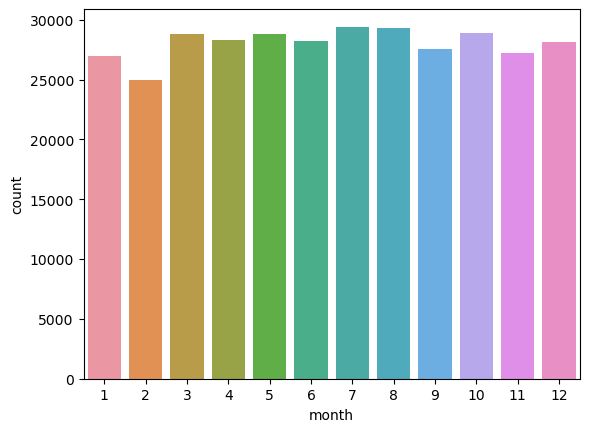

In [97]:
month_count = data['month'].value_counts()
print (month_count)
sns.countplot(x = data['month'])

=========================================================================================================================



<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون day :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
این ستون نشان دهنده روزی است که پرواز انجام شده است. بیشتری تعداد پرواز در روزهای 18 و 11 هر ماه و کمترین پرواز در روزهای پایانی ماه (28 و 29 و 30 و 31) ثبت شده است. البته تعداد کمتر پرواز انجام شده در روز 31 قطعاً به این دلیل است که در طی سال فقط 6 ماه 31 روزه وجود دارد.  </div>

day
18    11399
11    11359
22    11345
15    11317
8     11271
10    11227
17    11222
3     11211
21    11141
20    11111
13    11108
25    11097
19    11086
27    11084
6     11059
4     11059
24    11041
1     11036
12    11029
14    11008
7     10985
23    10966
16    10918
26    10883
5     10858
9     10857
2     10808
28    10773
30    10289
29    10039
31     6190
Name: count, dtype: int64


<Axes: xlabel='day', ylabel='count'>

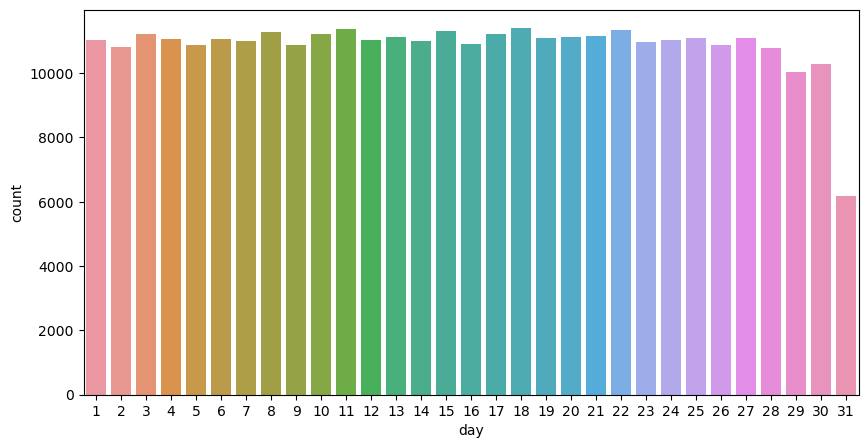

In [98]:
day_counts = data['day'].value_counts()
print(day_counts)
plt.figure (figsize = (10 , 5))
sns.countplot(x = data['day'] )

=========================================================================================================================

<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون arr_delay :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
این ستون نشان دهنده میزان تاخیر در رسیدن به مقصد است. اختلاف فاحش میان میانگین ساده و میانگین اصلاح شده، نشان دهنده وجود noise در ستون arr_delay است. با توجه به اینکه مقدار میانگین اصلاح شده کمتر از میانگین ساده است می توان نتیجه گرفت که نویز در سمت راست داده ها قرار دارد. مقدار مثبت skewness نیز این موضوع را تأیید میکند. علاوه بر آن در رسم نمودار هستوگرام داده های این ستون شاهد فشردگی داده ها به سمت چپ هستیم که این موضوع نیست وجود داده پرت در سمت راست را نشان میدهد.
</div>

In [99]:
data['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

In [100]:
def describe (data,col):
    print ('Trim Mean :',stats.trim_mean(data[col], 0.1) )    # میانگین اصلاح شده
    print ('Median    :',data[col].median())                  # میانه داده ها
    print ('Variance  :',data[col].var())                     # واریانس
    print ('skewness  :',data[col].skew())                    # چولگی
    print ('kurtosis  :',data[col].kurtosis())                # کشیدگی
    print ('Mode      :',data[col].mode())                    # مد (بیشترین تکرار داده ها)

describe(data,'arr_delay')

Trim Mean : 0.9612355338465307
Median    : -5.0
Variance  : 1992.130727102053
skewness  : 3.7168174804571863
kurtosis  : 29.233043998766775
Mode      : 0   -13.0
Name: arr_delay, dtype: float64


Text(0, 0.5, 'number of flights')

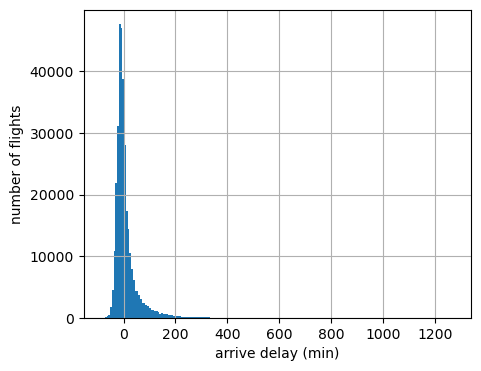

In [101]:
data['arr_delay'].hist(figsize = (5,4), bins = 200)
plt.xlabel('arrive delay (min)')
plt.ylabel('number of flights')

<div style="direction:rtl; text-align: right">
با توجه به متقارن بودن توزیع داده ها قانون سه سیگما برای آنها برقرار است و داریم :  </div>

In [102]:
def three_sigma (data,col):
    Mean_std_R = data[col].mean() + (data[col].std())
    Mean_std_L = data[col].mean() - (data[col].std())
    Mean_2std_R = data[col].mean() + (2 * data[col].std())
    Mean_2std_L = data[col].mean() - (2 * data[col].std())
    Mean_3std_R = data[col].mean() + (3 * data[col].std())
    Mean_3std_L = data[col].mean() - (3 * data[col].std())

    print(f'%68.27 of data is between {Mean_std_R} and {Mean_std_L}.')
    print(f'%95.45 of data is between {Mean_2std_R} and {Mean_2std_L}.')
    print(f'%99.73 of data is between {Mean_3std_R} and {Mean_3std_L}.')
    
three_sigma(data,'arr_delay')

%68.27 of data is between 51.52866844751015 and -37.737914932880365.
%95.45 of data is between 96.1619601377054 and -82.37120662307562.
%99.73 of data is between 140.79525182790067 and -127.00449831327089.


<div style="direction:rtl; text-align: right">
برای حذف اثر داده های پرت در اینجا از داده هایی که در فاصله بیشتر از 3 انحراف معیار از میانگین بودند صرف نظر کرده و مجدداً نمودار را رسم میکنیم.   </div>

Text(0, 0.5, 'Number of flights')

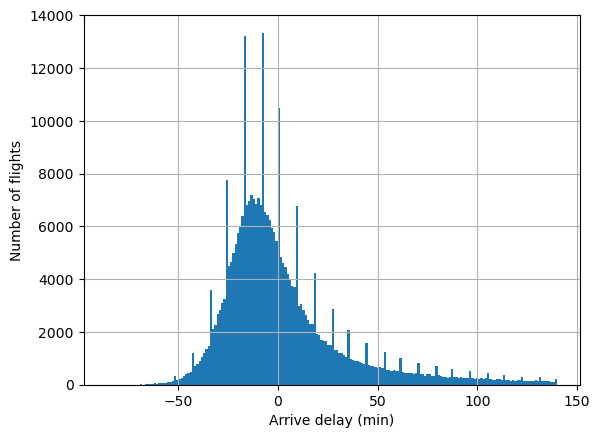

In [103]:
data['arr_delay'][data['arr_delay'] < 141].hist(bins=200)
plt.xlabel('Arrive delay (min)')
plt.ylabel('Number of flights')

=========================================================================================================================

<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون dep_delay :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
ستون dep_delay هم دقیقا شرایطی مشابه ستون arr_delay دارد. به این صورت که اختلاف بالا بین میانگین ساده و میانگین اصلاح شده، نشان دهنده وجود noise در این ستون  است. با توجه به اینکه مقدار میانگین اصلاح شده کمتر از میانگین ساده است می توان نتیجه گرفت که نویز در سمت راست داده ها قرار دارد. مقدار مثبت skewness نیز این موضوع را تأیید میکند. به علاوه فشردگی داده ها به سمت چپ در نمودار هیستوگرام وجود داده پرت در سمت راست را نشان میدهد.
</div>

In [104]:
data['dep_delay'].describe()

count    328521.000000
mean         12.639070
std          40.210061
min         -43.000000
25%          -5.000000
50%          -2.000000
75%          11.000000
max        1301.000000
Name: dep_delay, dtype: float64

In [105]:
describe(data,'dep_delay')

Trim Mean : 4.798201334709118
Median    : -2.0
Variance  : 1616.8489969469451
skewness  : 4.802540511080034
kurtosis  : 43.95011602901041
Mode      : 0   -5.0
Name: dep_delay, dtype: float64


Text(0, 0.5, 'Number of flights')

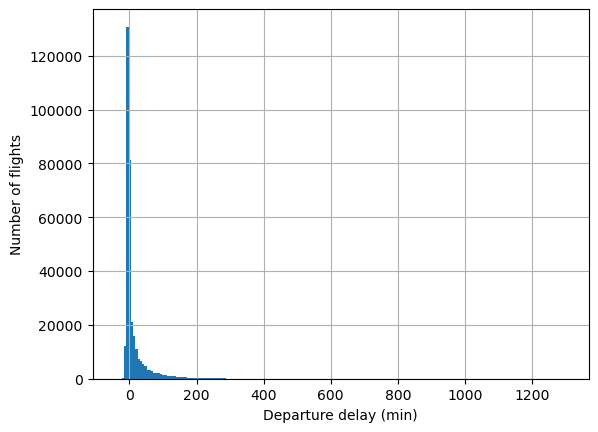

In [106]:
data['dep_delay'].hist(bins = 200)
plt.xlabel('Departure delay (min)')
plt.ylabel('Number of flights')

In [107]:
three_sigma(data,'dep_delay')

%68.27 of data is between 52.84913114941161 and -27.570990634802193.
%95.45 of data is between 93.05919204151851 and -67.7810515269091.
%99.73 of data is between 133.2692529336254 and -107.991112419016.


Text(0, 0.5, 'Number of flights')

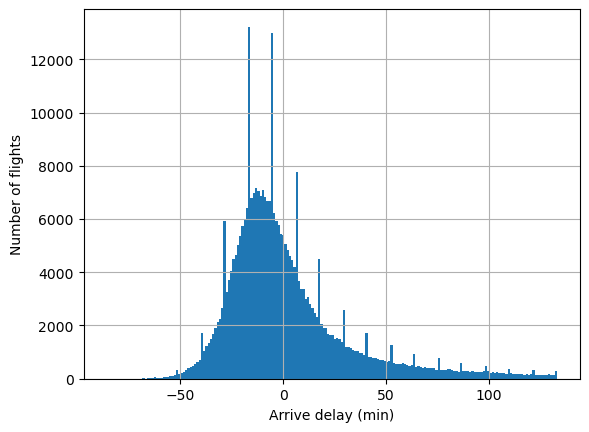

In [108]:
data['arr_delay'][data['arr_delay'] < 134].hist(bins=200)
plt.xlabel('Arrive delay (min)')
plt.ylabel('Number of flights')

=========================================================================================================================

<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون tailnum :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
Tail number یا شماره دم که با همین نام هم شناخته می‌شود، شماره‌ای است که به هواپیما اختصاص داده می‌شود. هر هواپیما با یک شماره دم یا tail number مشخص می‌شود که معمولا به صورت الفبایی-عددی است. این شماره بر روی بدنه‌ی هواپیما چاپ شده و به عنوان شناسه‌ای برای هواپیما استفاده می‌شود.
شماره دم اطلاعات مهمی را درباره‌ی هواپیما ارائه می‌دهد، از جمله نوع هواپیما، سازنده، سال ساخت و تاریخ آخرین بازرسی فنی. این شماره برای ارجاع به هواپیما در مواردی مانند ترافیک هوایی، حوادث هوایی یا بررسی امنیت هواپیماها استفاده می‌شود. در این دیتاست تعداد 4043 هواپیما استفاده شده که رکورد بیشترین پرواز متعلق به هواپیمای N725MQ است که 575 پرواز داشته است.
</div>

In [109]:
data['tailnum'].describe()

count     334264
unique      4043
top       N725MQ
freq         575
Name: tailnum, dtype: object

=========================================================================================================================


<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون origin :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
این ستون نشان دهنده مبداء پروازهاست و همانطور که مشاهده می شود شامل سه مبداء EWR ، LGA و JFK می باشد که بیشترین پرواز (120835 پرواز) از مبداء EWR بوده است.
</div>

In [110]:
data['origin'].describe()

count     336776
unique         3
top          EWR
freq      120835
Name: origin, dtype: object

In [111]:
pd.unique(data['origin'])

array(['EWR', 'LGA', 'JFK'], dtype=object)

origin
EWR    120835
JFK    111279
LGA    104662
Name: count, dtype: int64


<Axes: xlabel='origin', ylabel='count'>

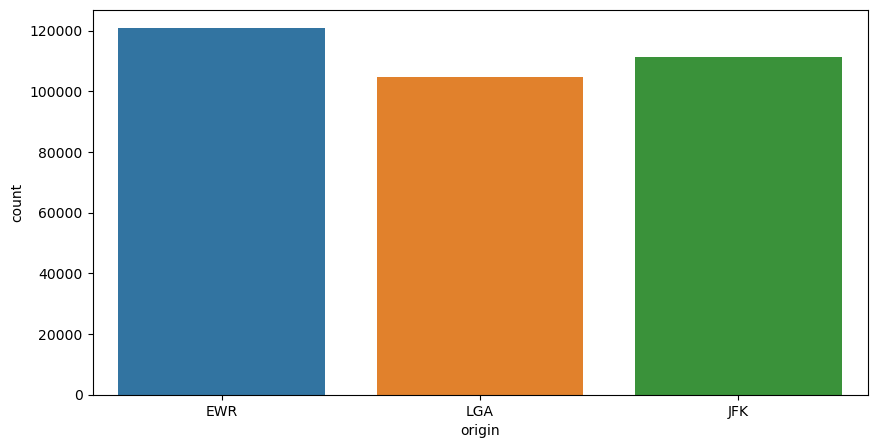

In [112]:
day_counts = data['origin'].value_counts()
print(day_counts)
plt.figure (figsize = (10 , 5))
sns.countplot(x = data['origin'] )

=========================================================================================================================

<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون dest :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
این ستون حاوی اطلاعات مربوط به مقصد است که شامل 105 مقصد مختلف می باشد. بیشترین تعداد پرواز به مقصد ORD  (تعداد 17283) پرواز بوده است.
</div>

In [113]:
data['dest'].describe()

count     336776
unique       105
top          ORD
freq       17283
Name: dest, dtype: object

=========================================================================================================================

<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون distance :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
این ستون اطلاعات مربوط به فاصله مبداء و مقصد را نمایش میدهد که حداقل مسافت ثبت شده 17 بوده که چه بر حسب کیلومتر باشد چه بر حسب مایل (17 مایل معادل 27.36 کیلومتر است) پرواز به چنین فاصله کمی منطقی به نظر نمی رسد و میتواند ناشی از خطا در ثبت اطلاعات بوده باشد. با فراخوانی اطلاعات ردیف مربوط به این مقدار مشاهده میشود که اطلاعات برخی دیگر از ستونها نیز ثبت نشده و به صوت NaN نمایش داده می شود. بنابراین این ردیف را می توانیم این ردیف را به عنوان داده پرت در نظر گرفته و آن را حذف کنیم. هرچند مقایسه خلاصه اطلاعات این ستون قبل و پس از حذف نشان میدهد که وجود آن تاثیر بسیار ناچیزی داشته است. اکنون کمترین فاصله 80 و بیشترین فاصله 4983 می باشد.  
</div>

In [114]:
data['distance'].describe()

count    336776.000000
mean       1039.912604
std         733.233033
min          17.000000
25%         502.000000
50%         872.000000
75%        1389.000000
max        4983.000000
Name: distance, dtype: float64

In [115]:
data[data['distance'] == 17]

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
275945,275945,2013,7,27,NaN,106,NaN,NaN,245,NaN,...,1632,NaN,EWR,LGA,NaN,17,1,6,2013-07-27 01:00:00,US Airways Inc.


In [116]:
data2 = data.drop(data[data['distance'] == 17].index)       # حذف داده نویز

In [117]:
data2['distance'].describe()

count    336775.000000
mean       1039.915641
std         733.232003
min          80.000000
25%         502.000000
50%         872.000000
75%        1389.000000
max        4983.000000
Name: distance, dtype: float64

=========================================================================================================================

<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ستون name :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
در این ستون نام شرکت هواپیمایی مربوطه نوشته شده است. همانطور که مشاهده می شود پروازهای ثبت شده در این دیتاست مربوط به 16 شرکت هواپیمایی مختلف است که از میان آنها شرکت United Air Lines بیشتری تعداد پرواز (58665 پرواز) و شرکت SkyWest Airlines کمترین تعداد پرواز (تنها 32 پرواز) را داشته اند.  
</div>

name
United Air Lines Inc.          58665
JetBlue Airways                54635
ExpressJet Airlines Inc.       54173
Delta Air Lines Inc.           48110
American Airlines Inc.         32729
Envoy Air                      26397
US Airways Inc.                20536
Endeavor Air Inc.              18460
Southwest Airlines Co.         12275
Virgin America                  5162
AirTran Airways Corporation     3260
Alaska Airlines Inc.             714
Frontier Airlines Inc.           685
Mesa Airlines Inc.               601
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             32
Name: count, dtype: int64


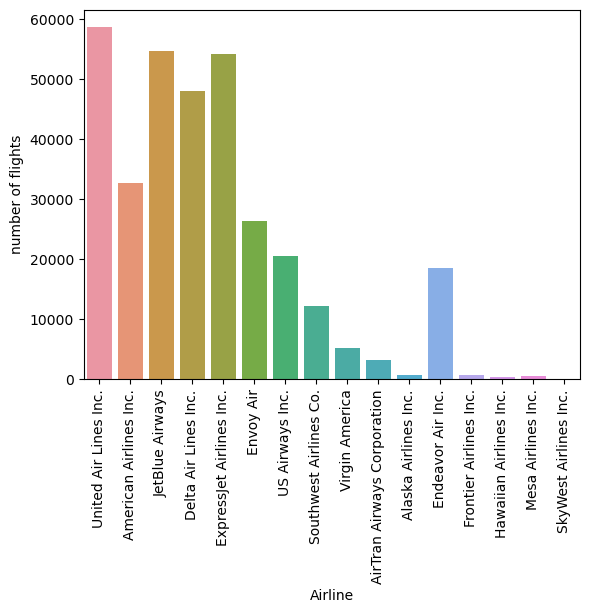

In [118]:
airline_count = data['name'].value_counts()
print(airline_count)
sns.countplot(x = data['name'])
plt.xlabel('Airline')
plt.ylabel('number of flights')
plt.xticks(rotation = 90)
plt.show()

=========================================================================================================================


<div style="direction:rtl; text-align: right">
<span style="font-size: 30px; color: red">
<b>    
بررسی ارتباط بعضی از ستونها :
</b>
</span>
</div>

<div style="direction:rtl; text-align: right">
 با توجه به محاسبات همبستگی میان ستونها ، ملاحظه میشود که ستون arr_delay (تاخیر در رسیدن به مقصد) با ستونهای dep_time (زمان پرواز) , dep_delay (تاخیر در پرواز) همبستگی بالایی دارد (به ترتیب 23 و 91 درصد)  </div>

In [119]:
df = pd.DataFrame(data,columns =['month','day','dep_time','dep_delay','arr_delay','distance'])
df.corr() * 100

,month,day,dep_time,dep_delay,arr_delay,distance
month,100.000000,0.294235,-0.393242,-2.005702,-1.738202,2.163565
day,0.294235,100.000000,-0.046737,0.042001,-0.031916,0.304130
dep_time,-0.393242,-0.046737,100.000000,26.023123,23.230573,-1.399821
dep_delay,-2.005702,0.042001,26.023123,100.000000,91.480276,-2.167079
arr_delay,-1.738202,-0.031916,23.230573,91.480276,100.000000,-6.186776
distance,2.163565,0.304130,-1.399821,-2.167079,-6.186776,100.000000


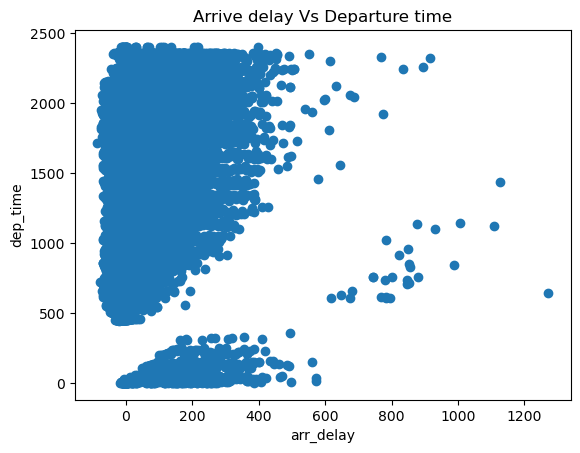

In [120]:
plt.scatter(data['arr_delay'] , data['dep_time'])
plt.title ('Arrive delay Vs Departure time')
plt.xlabel('arr_delay')
plt.ylabel('dep_time')
plt.show()

<div style="direction:rtl; text-align: right">
با توجه به اینکه طبق نمودار بالا رابطه بین arr_delay و dep_time از نوع رابطه خطی نمی باشد بنابراین مقدار همبستگی محاسبه شده نمی تواند اطلاعات صحیحی ارائه دهد.
</div>

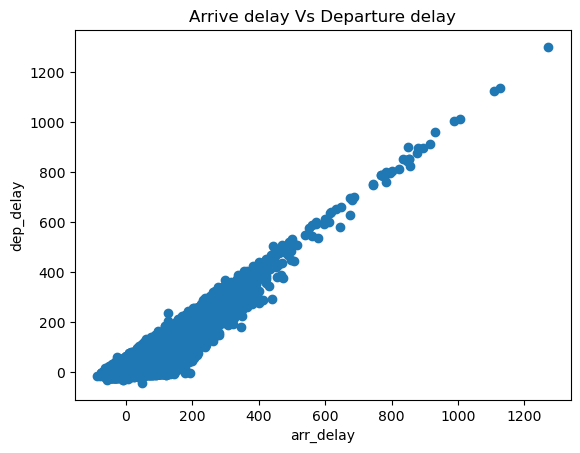

In [121]:
plt.scatter(data['arr_delay'] , data['dep_delay'])
plt.title ('Arrive delay Vs Departure delay')
plt.xlabel('arr_delay')
plt.ylabel('dep_delay')
plt.show()

<div style="direction:rtl; text-align: right">
اما همانطور که در این نمودار مشخص است رابطه بین تاخیر در پرواز و تاخیر در رسیدن به مقصد کاملاً یک رابطه خطی و مستقیم است. بنابراین با توجه به نوع رابطه و درصد بالای همبستگی میتوان نتیجه گرفت که تاخیر در پرواز بر تاخیر در رسیدن به مقصد اثرگذار بوده  یکی از دلایل آن است.
</div>